In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df['type']=='Rural')

18

In [10]:
# Get the columns and the rows that are not null 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Get the columns data types
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# combining the two data frames into a single dataset 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

#display the data frame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Creating the URBAN CITY DATA FRAME
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
#urban_cities_df.head()

In [14]:
# CREATE THE SUBURBAN CITY AND RURAL DATA FRAME
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
#rural_cities_df

In [15]:
# NUMBER OF RIDES FOR EACH CITY TYPE

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
#urban_ride_count.head()
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [16]:
# GETTING THE AVERAGE FARE

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
#urban_avg_fare.head()
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']


In [17]:
# GETTING AVERAGE NO OF DRIVERS FOR EACH CITY
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
#urban_driver_count.head()
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

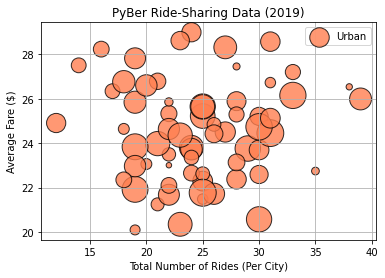

In [18]:
# BUILDING THE SCATTER PLOT FOR URBAN CITIES

plt.scatter(urban_ride_count,
            urban_avg_fare,
            c='coral',
            edgecolor='black',
            alpha=0.8,
            linewidths=1,
            s=10*urban_driver_count,
           label = 'Urban')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

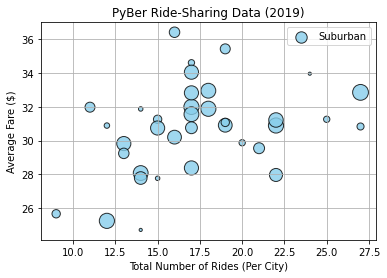

In [19]:
# BUILDING THE SCATTER PLOT FOR SUBURBAN CITIES

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            c='skyblue',
            edgecolor='black',
            alpha=0.8,
            linewidths=1,
            s=10*suburban_driver_count,
           label = 'Suburban')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.grid(True)
plt.legend()

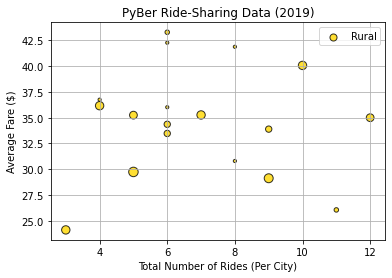

In [20]:
# BUILDING THE SCATTER PLOT FOR RURAL CITIES

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#plt.scatter=(rural_ride_count,
 #           rural_avg_fare,
  #          s=10*rural_driver_count,
   #         c='gold',
    #        linewidths=1, edgecolor='black',
     #       alpha=0.8, label='Rural')
#plt.title('PyBer Ride-Sharing Data (2019)')
#plt.xlabel('Total Number of Rides (Per City)')
#plt.ylabel('Average Fare ($)')
#plt.grid(True)
#plt.legend()

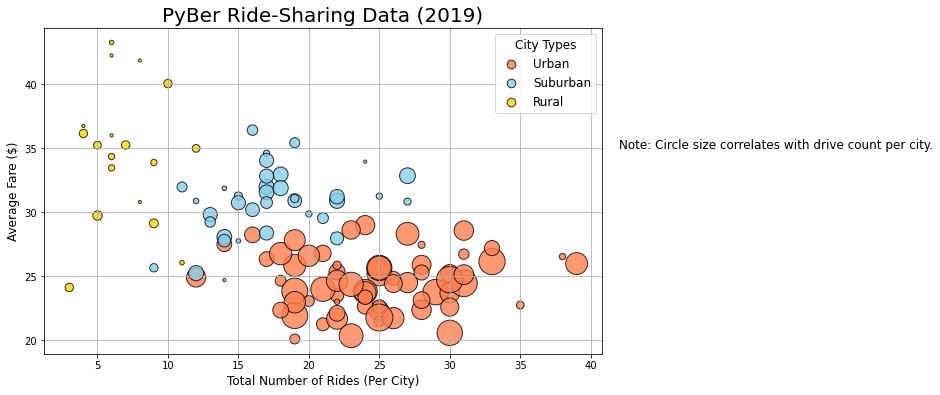

In [21]:
# Combining 3 plots into one large plot

plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            c='coral',
            edgecolor='black',
            alpha=0.8,
            linewidths=1,
            s=10*urban_driver_count,
            label = 'Urban')

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            c='skyblue',
            edgecolor='black',
            alpha=0.8,
            linewidths=1,
            s=10*suburban_driver_count,
            label = 'Suburban')

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")

# Incorporate the other graph properties.
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# Create a legend since legend is having the average fare for the city
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best',title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about the circle size.
plt.text(42,35, "Note: Circle size correlates with drive count per city.", fontsize='12')

# Save the figure
plt.savefig("analysis/Fig01.png")

In [23]:
# Show the Plot
plt.show()

In [24]:
# SUMMARY STATISTICS (NUmber of rides by City Type)
# Get summary statistics Urban
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
# Get summary statistics Suburban
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [26]:
# Get summary statistics Rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [27]:
# Summary Statistics for Urban (Ride count)
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
# Summary Statistics for Suburban (Ride count)
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
# Summary Statistics for Rural (Ride count)
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
# calculate the mean ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

# noting that the mean calculating it individually is the same as the describe() function

(24.62, 17.36, 6.94)

In [36]:
# calculate the median ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [38]:
# NUMPY mean() median() mode() - optional approach

import numpy as np
import scipy.stats as sts

In [40]:
# Calculate the measure of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [44]:
# Calculate the measure of central tendency for the ride count for the Suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [45]:
# Calculate the measure of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 17.36.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [46]:
# Calculate the average fares for each city types.
# Get the fares for the urban cities

urban_fares = urban_cities_df.fare
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [49]:
# Calculate mean meadian and mode using numpy and scipy for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [50]:
# Calculate mean meadian and mode using numpy and scipy for suburban cities
suburban_fares = suburban_cities_df.fare

mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fares:.2f}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is ${mode_suburban_fares}.')

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [51]:
# Calculate mean meadian and mode using numpy and scipy for suburban cities
rural_fares = rural_cities_df.fare

mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fares:.2f}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is ${mode_rural_fares}.')

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [55]:
#SUMMARY STATISTICS FOR NUMBER OF DRIVERS BY CITY TYPES
# Get the driver count data from the urban cities

urban_drivers = urban_cities_df.driver_count

mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean number of drivers for urban cities is {mean_urban_drivers:.2f}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median number of drivers for urban cities is {median_urban_drivers:.2f}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode number of drivers for urban cities is {mode_urban_drivers}.')

The mean number of drivers for urban cities is 36.68.
The median number of drivers for urban cities is 37.00.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [60]:
# Get the driver count data from the urban cities

suburban_drivers = suburban_cities_df.driver_count

mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean number of drivers for suburban cities is {mean_suburban_drivers}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median number of drivers for suburban cities is {median_suburban_drivers:.2f}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode number of drivers for suburban cities is {mode_suburban_drivers}.')

The mean number of drivers for suburban cities is 13.712.
The median number of drivers for suburban cities is 16.00.
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [61]:
# Get the driver count data from the rural cities

rural_drivers = rural_cities_df.driver_count

mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean number of drivers for rural cities is {mean_rural_drivers:.2f}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median number of drivers for rural cities is {median_rural_drivers:.2f}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode number of drivers for rural cities is {mode_rural_drivers}.')

The mean number of drivers for rural cities is 4.30.
The median number of drivers for rural cities is 4.00.
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).
